In [1]:
# Import packages
from SWAP import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

np.set_printoptions(precision = 10,suppress = True)

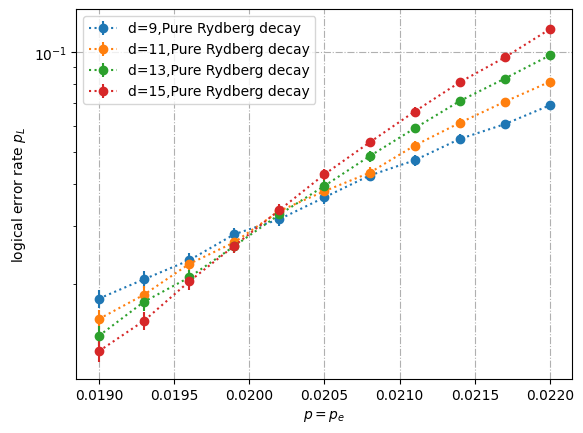

In [2]:
# Derive the threshold of Pure Rydberg Decay
dlist = [9,11,13,15]
errorlist = np.linspace(0.019,0.022,11)
nshot = int(1e5)
lerlist = np.zeros([2,4,11])

for i in range(4):
    d = dlist[i]
    for j in range(11):
        error = errorlist[j]
        swap = SWAP(d,error)
        result = swap.logical_parallel(nshot)
        ler,deriviation = get_pfail(result[1],result[0])
        lerlist[0,i,j] = ler
        lerlist[1,i,j] = deriviation

figure,ax = plt.subplots()
for i in range(len(dlist)):
    ax.errorbar(errorlist,lerlist[0,i,:],lerlist[1,i,:],fmt = 'o:',label = 'd=%d,Pure Rydberg decay'%(dlist[i]))
ax.set_xlabel('$p=p_e$')
ax.set_ylabel('logical error rate $p_L$')
ax.set_yscale('log')
ax.legend()
plt.grid(linestyle='-.',alpha = 1)

In [3]:
# Fit the threshold with universal scaling ansatz for critical points of phase transitions
fit_threshold_1(errorlist,lerlist[0])

[0.0000244 0.0000293 0.0000323 0.0000388 0.0000473 0.0000509 0.000058
 0.0000642 0.000078  0.0000828 0.0001004 0.0001124 0.0001267 0.0001544
 0.0001748 0.0001995 0.0002348 0.0002639 0.0003    0.0003432 0.0004043] [0.0000586 0.00006   0.000074  0.0000784 0.0000952 0.0001038 0.0001256
 0.0001288 0.0001366 0.0001532 0.0001846 0.0002104 0.0002372 0.0002764
 0.0003    0.0003278 0.0003754 0.0004342 0.000467  0.0005604 0.0006376]
2.995967365705646 -1.6026129360034904 0.9994397862153367 1.6790429811845765e-29 0.02301625731393068
2.5909504038111835 -1.6573704540809153 0.9984986419934647 1.953120102006057e-25 0.0326083543420664


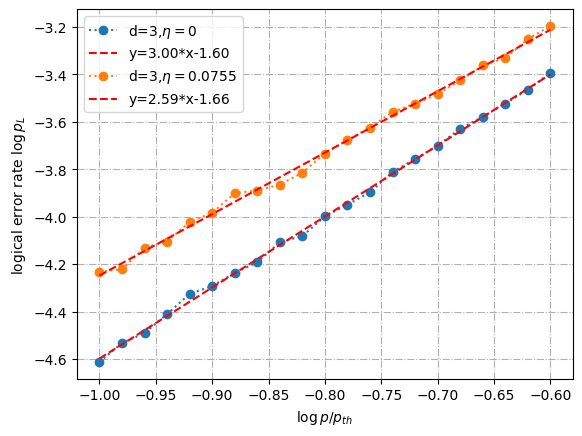

In [5]:
# Derive the distance and identify the critical fault
d = 3
pref = 0.02 # threshold derived above
errorlist1 = np.logspace(-1,-0.6,21)*pref
simulation_list1 = np.zeros([21])
simulation_list2 = np.zeros([21])

for i in range(21):
    error = errorlist1[i]
    swap1 = SWAP(d,error,eta = 0,logicals='X2')
    swap2 = SWAP(d,error,logicals='X2')
    result1 = swap1.logical_parallel(int(1e7))
    result2 = swap2.logical_parallel(int(5e6))
    simulation_list1[i] = raw_data(result1)
    simulation_list2[i] = raw_data(result2)

print(simulation_list1,simulation_list2)

errorlog = np.linspace(-1,-0.6,21)
simul1 = np.log10(simulation_list1).reshape(len(errorlist1))
simul2 = np.log10(simulation_list2).reshape(len(errorlist1))
slope1,intercept1,r1,p1,std_err1 = linregress(errorlog,simul1)
slope2,intercept2,r2,p2,std_err2 = linregress(errorlog,simul2)

print(slope1,intercept1,r1,p1,std_err1)
print(slope2,intercept2,r2,p2,std_err2)

figure,ax = plt.subplots()
ax.plot(errorlog,simul1,"o:",label = 'd=3,$\eta = 0$')
ax.plot(errorlog,intercept1+slope1*errorlog,linestyle = '--',color='r',label = 'y=%.2f*x%.2f'%(slope1,intercept1))
ax.plot(errorlog,simul2,"o:",label = 'd=3,$\eta = 0.0755$')
ax.plot(errorlog,intercept2+slope2*errorlog,linestyle = '--',color='r',label = 'y=%.2f*x%.2f'%(slope2,intercept2))
ax.set_xlabel('$\log p/p_{th}$')
ax.set_ylabel('logical error rate $\log p_L$')
plt.grid(linestyle='-.',alpha = 1)
ax.legend()